# Práctica de Machine Learning nº1
El objetivo de la prática consiste en clasificar y evaluar diferentes algoritmos de clasificación de ML.

Los datos son imágenes de escasa resolución de objetos reales (por ejemplo: un oso, un avión, un tren, etc.). Los datos están separados en varios ficheros:


```bash
├── batches.meta dispone de información descriptiva de las etiquetas usadas
├── data_batch_1  datos_lote_1
├── data_batch_2  datos_lote_2
├── data_batch_3  datos_lote_3
├── data_batch_4  datos_lote_4
├── data_batch_5  datos_lote_5
└── test_batch    muestras que podrían utilizarse como test
```

Estos ficheros se proporcionan en formato binario por su elevado tamaño.

A continuación, adjuntamos código para mostrar operaciones básicas de acceso a estos datos, formato y dimensión. 
Advertencia: tened en cuenta el 'path del fichero' a la hora de cargar cada uno de ellos.

**El resto del enunciado está al final del documento.**

In [3]:
# Librerías 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

#Función para la carga de datos. Formato binario propio de pandas: pickle
def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

In [4]:
# Fichero 
data = unpickle("/users/BalentinaAE/PYTHON/Projects/Notebooks/data_batch_1")
print(data.keys())


print(len(data[b'labels']))
print(data[b'labels'][0])
print("*"*30)
print(data[b'data'][0])
print(len(data[b'data'][0]))
print(data[b'data'].shape)
print("*"*30)

print(len(data[b'batch_label']))
print(data[b'batch_label'])
print("*"*30)
print(len(data[b'filenames']))



dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
10000
6
******************************
[ 59  43  50 ... 140  84  72]
3072
(10000, 3072)
******************************
21
b'training batch 1 of 5'
******************************
10000


In [5]:
meta = unpickle("batches.meta")
print(meta.keys())

print(meta[b'num_cases_per_batch'])
print(meta[b'label_names'][0])

print("*"*30)


dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
10000
b'airplane'
******************************


In [6]:
# Cada entidad, se encuentra en una posición de cada uno de los anteriores atributos
# Vamos a ver la entidad '0'
d0 = data[b'data'][0]
print(len(d0))

3072


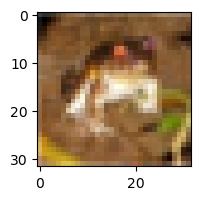

In [7]:
# Los datos de cada entidad contienen los valores de la imagen. La imagen se obtiene por la combinación de tres canales/capas (red, green, blue) de la siguiente forma:
ch0 = d0[0:1024]
ch1 = d0[1024:2048]
ch2 = d0[2048:]

# Cada canal es una capa del correspondiente color
ch0 = np.reshape(ch0, (32,32)) # red
ch1 = np.reshape(ch1, (32,32)) # green
ch2 = np.reshape(ch2, (32,32)) # blue

# La combinación de ellas da una imagen con los tres colores:
image = np.dstack((ch0, ch1, ch2))


fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image)
plt.show()

6
b'frog'
------------------------------


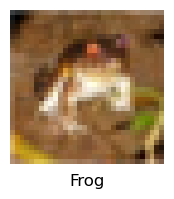

In [9]:
# La etiqueta y categoría de la entidad '0' están codificados en los atributos:
code_fine_label = data[b'labels'][0]
# Necesitamos la información del fichero META para poner nombre al código de la etiqueta
code_coarse_label = meta[b'label_names'][code_fine_label]
print(code_fine_label)
print(code_coarse_label)

print("-"*30)

fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image)
ax.set_title(code_coarse_label.decode("utf-8").capitalize(),y=-.2)
plt.axis('off')
plt.show()

## Enunciado

Se pide:
- 1. Analiza con mayor detalle la dimensionalidad de los datos. En esta sección se valorará el uso de gráficos.
- 2. Selecciona datos para entrenar un modelo de clasificación usando la librería scikit-learn con tan solo las entidades de tres categorías elegidas al azar por el sistema. Importante: si así lo considerás no hace falta que selecciones todas las muestras de esos tipos que hay en todos los lotes!
- 3. Aplica, configura y analiza los resultados tras aplicar los siguientes algoritmos de clasificación sobre los datos seleccionados previamente (se valorarán el estudio de diferentes parametrizaciones):
  - Support Vector Machine
  - Random Forest Classifier
  - K Neighbors Classifier
  - AdaBoots
- 4. Compara los resultados de los algoritmos. En esta sección se valorarán las visualizaciones.

Entrega:
- Solo está permitida la entrega de **un único** documento con formato notebook de jupyter (.ipynb) mediante su subida a la tarea en AulaDigital. Se espera un informe combinado de texto y código documentado.
  - Especificar en la primera celda del documento: nombre y apellidos.

  - Entregar el notebook con los resultados de su ejecución. 


Dimensiones 

C:\Users\BalentinaAE\AppData\Local\Temp\ipykernel_36404\3463891431.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


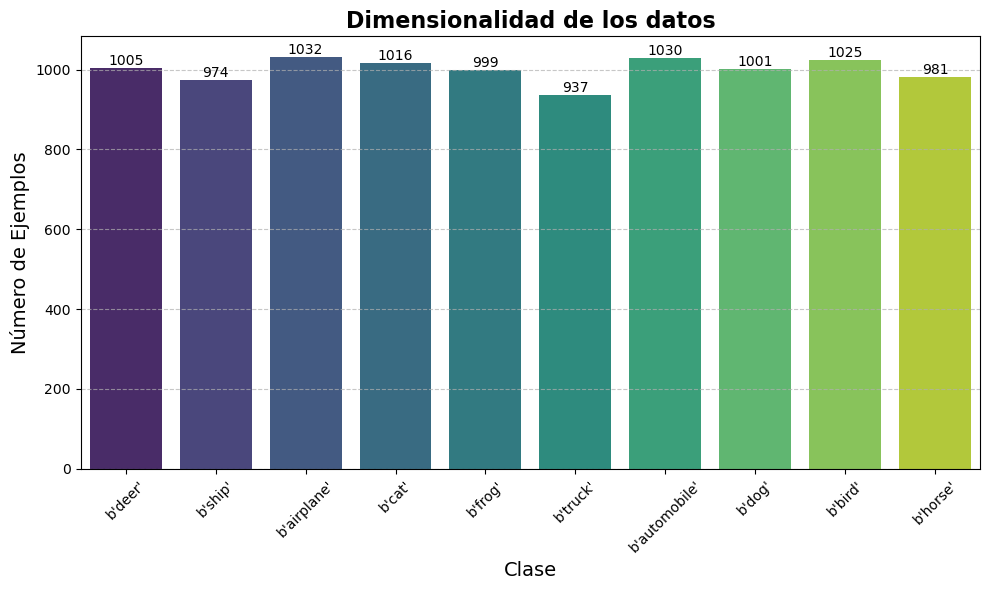

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

class_counts = pd.Series(data[b'labels']).value_counts()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')

plt.title('Dimensionalidad de los datos', fontsize=16, fontweight='bold')
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Número de Ejemplos', fontsize=14)
plt.xticks(ticks=class_counts.index, labels=meta[b'label_names'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()



In [25]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split

data = unpickle("/users/BalentinaAE/PYTHON/Projects/Notebooks/data_batch_1")
meta = unpickle("/users/BalentinaAE/PYTHON/Projects/Notebooks/batches.meta")

labels = np.array(data[b'labels'])
label_names = np.array(meta[b'label_names'])

selected_labels = random.sample(list(set(labels)), 3)

mask = np.isin(labels, selected_labels)
X_selected = data[b'data'][mask]
y_selected = labels[mask]

df = pd.DataFrame(X_selected)
df['label'] = y_selected

ssampled_df = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=min(150, len(x)), random_state=42)).reset_index(drop=True)

X_sampled = sampled_df.drop('label', axis=1).to_numpy()
y_sampled = sampled_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

print("Datos seleccionados para entrenamiento:", X_train.shape)
print("Datos seleccionados para prueba:", X_test.shape)
print("Etiquetas seleccionadas (primeras 10):", y_train[:10])
print("Categorías seleccionadas:", label_names[selected_labels])



Datos seleccionados para entrenamiento: (240, 3072)
Datos seleccionados para prueba: (60, 3072)
Etiquetas seleccionadas (primeras 10): [9 3 3 5 5 3 3 9 3 5]
Categorías seleccionadas: [b'ship' b'automobile' b'airplane']


C:\Users\BalentinaAE\AppData\Local\Temp\ipykernel_36404\1864253084.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssampled_df = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=min(150, len(x)), random_state=42)).reset_index(drop=True)
